# A Facial Recognition Model using PCA & SVM Algorithms

We want to use Principal Component Analysis and Support Vector Machines for building a [facial recognition model](https://towardsdatascience.com/building-a-facial-recognition-model-using-pca-svm-algorithms-c81d870add16).

More theory on [SVM](https://share.cocalc.com/share/e9d2f604-5c15-48c1-8c69-4d560cf9a933/PythonDataScienceHandbook/notebooks/05.07-Support-Vector-Machines.ipynb?viewer=share).

0. Import the usual libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

1. From ```sklearn.datasets``` import ```fetch_lfw_people``` and put it into a numpy array.

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

In [4]:
faces

{'data': array([[ 83.      ,  91.666664, 112.      , ..., 112.333336, 146.      ,
         124.333336],
        [ 38.666668,  69.666664,  84.666664, ...,  67.      ,  88.333336,
         115.      ],
        [ 82.666664,  58.      ,  59.      , ..., 171.33333 ,  90.333336,
          82.333336],
        ...,
        [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
         166.33333 ],
        [138.      , 158.66667 , 169.66667 , ..., 232.66667 , 228.33333 ,
         226.      ],
        [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
          61.      ]], dtype=float32),
 'images': array([[[ 83.      ,  91.666664, 112.      , ...,  54.333332,
           62.      ,  76.333336],
         [ 89.      ,  95.      , 100.      , ...,  51.666668,
           47.666668,  69.333336],
         [ 93.      ,  93.666664,  85.333336, ...,  62.      ,
           47.666668,  56.      ],
         ...,
         [ 48.666668,  46.666668,  45.666668, ..., 177.66667 ,
     

In [5]:
faces.target.shape

(1560,)

The lfw dataset consists of a database of face photographs designed for studying the problem of unconstrained face recognition. The data set contains more than 13,000 images of faces collected from the web. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set.
The images are in grayscale (pixel values = 0 - 255).

The ```faces.target``` is a 1560x1 NumPy array that contains the values 0–6 of the name the 1560 pictures correspond to. So if the id 0 has a target value of 5, it would refer to “Hugo Chavez”, as depicted in the ```target_names```:

2. See the variables ```target_names```

In [6]:
list(faces.target_names)

['Ariel Sharon',
 'Colin Powell',
 'Donald Rumsfeld',
 'George W Bush',
 'Gerhard Schroeder',
 'Hugo Chavez',
 'Jacques Chirac',
 'Jean Chretien',
 'John Ashcroft',
 'Junichiro Koizumi',
 'Serena Williams',
 'Tony Blair']

3. Check the ```shape``` of the images 

In [7]:
faces.images.shape

# 1st dimension: total number of pictures that we have
# 2nd dimension: height of the image
# 3rd dimension: width of the image

(1560, 50, 37)

We have 1560 samples (pictures) with a height of 50 px and a width of 37 px (50 x 37 = 1850 features for each image)

In [8]:
faces.images[0]

array([[ 83.      ,  91.666664, 112.      , ...,  54.333332,  62.      ,
         76.333336],
       [ 89.      ,  95.      , 100.      , ...,  51.666668,  47.666668,
         69.333336],
       [ 93.      ,  93.666664,  85.333336, ...,  62.      ,  47.666668,
         56.      ],
       ...,
       [ 48.666668,  46.666668,  45.666668, ..., 177.66667 , 131.33333 ,
         89.333336],
       [ 48.      ,  47.      ,  46.      , ..., 149.66667 , 141.      ,
        101.333336],
       [ 47.666668,  47.      ,  45.666668, ..., 112.333336, 146.      ,
        124.333336]], dtype=float32)

We have a np.array of 3 dimensions. The 1st dimension is the number of pixels in line of your image, i.e. the **height of the image**, the 2nd dimension is the number of pixels in column, i.e. the **width of the image** and the last is the colour of the image. 

4. Use matplotlib ```imshow()``` to see an image.

Text(0.5, 0, 'Hugo Chavez')

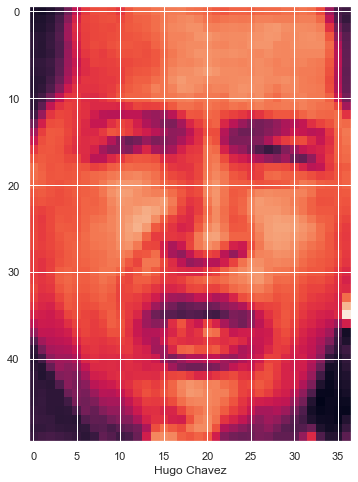

In [9]:
plt.imshow(faces.images[1559])
plt.xlabel(faces.target_names[faces.target[1559]])

In [10]:
shape_image = faces.images[0].shape
shape_image

(50, 37)

5. Visualize the first 15 images with a for cycle using:

    1. [enumerate()](http://book.pythontips.com/en/latest/enumerate.html)
    2. [plt.subplots()](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)
    3. [ax.flat](https://stackoverflow.com/questions/46862861/what-does-axes-flat-in-matplotlib-do)


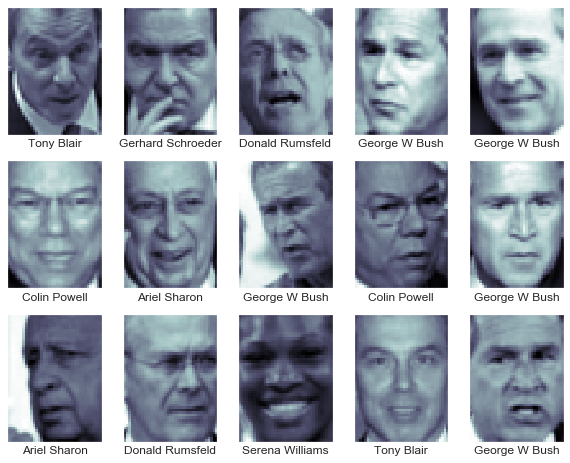

In [11]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

5. Import Support Vector Machine of Sklearn and create an instance of the model

In [12]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', class_weight='balanced')

6. Split the data in train and test 

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data,
                                                    faces.target,
                                                    test_size=0.30,
                                                    stratify = faces.target,
                                                    random_state = 42)

7. Train the svm model and check the score

First we scale the data:

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Then we fit the ```X_train``` to the svm model

In [15]:
%time svm.fit(X_train, y_train)   # check the time to train the model

CPU times: user 4.62 s, sys: 24.7 ms, total: 4.65 s
Wall time: 4.66 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
%time svm.score(X_test, y_test)*100

CPU times: user 1.01 s, sys: 5.78 ms, total: 1.01 s
Wall time: 1.03 s


71.58119658119658

8. We want to improve our model and check wether we should have use different parameters in the SVM model. We use a ```GridSearch``` to check the best parameters.

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.0005, 0.001],
              'class_weight':['balanced',None]
              }

grid = GridSearchCV(svm, param_grid, verbose=0, n_jobs=-1)
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'class_weight': ['balanced', None],
                         'gamma': [0.0001, 0.0005, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'class_weight': ['balanced', None],
                         'gamma': [0.0001, 0.0005, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
print(grid.best_params_)

{'C': 10, 'class_weight': None, 'gamma': 0.0001}


In [20]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.8205128205128205

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.52      0.56        23
     Colin Powell       0.68      0.72      0.70        71
  Donald Rumsfeld       0.71      0.75      0.73        36
    George W Bush       0.80      0.79      0.80       159
Gerhard Schroeder       0.58      0.67      0.62        33
      Hugo Chavez       0.62      0.48      0.54        21
   Jacques Chirac       0.83      0.62      0.71        16
    Jean Chretien       0.69      0.56      0.62        16
    John Ashcroft       0.62      0.62      0.62        16
Junichiro Koizumi       0.92      0.61      0.73        18
  Serena Williams       0.65      0.94      0.77        16
       Tony Blair       0.67      0.74      0.70        43

         accuracy                           0.72       468
        macro avg       0.70      0.67      0.68       468
     weighted avg       0.72      0.72      0.71       468



In [22]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

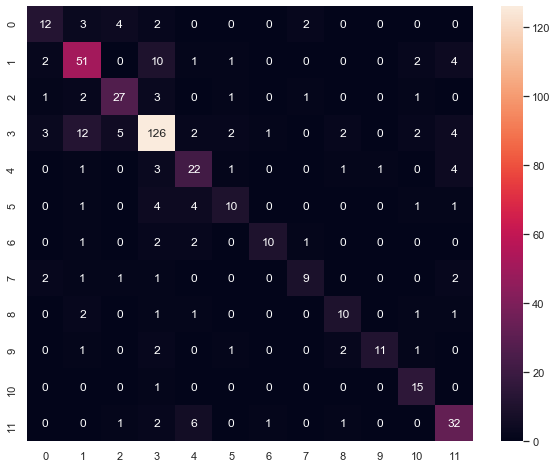

In [23]:
cm = confusion_matrix(y_test, y_pred, labels=range(faces.target_names.shape[0]))
sns.heatmap(cm, annot = True, fmt = "d", xticklabels = True, yticklabels = True)

In [24]:
X_test[i].shape

(1850,)

In [25]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

def plot_gallery(images, titles, shape_image, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape(shape_image), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

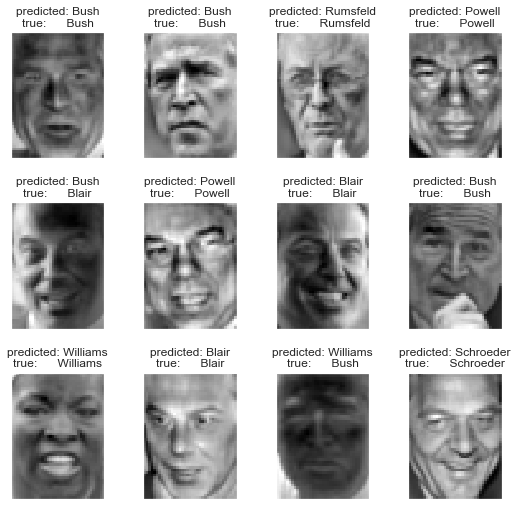

In [26]:
prediction_titles = [title(y_pred, y_test, faces.target_names, i) for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, shape_image)

In [27]:
def plot_predicted_names(y_pred):
    fig, ax = plt.subplots(4, 6)
    for i, axi in enumerate(ax.flat):
        axi.imshow(X_test[i].reshape(shape_image), cmap='bone')
        axi.set(xticks=[], yticks=[])
        axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],  # it takes only the surname 
                   color='black' if y_pred[i] == y_test[i] else 'red')
    fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

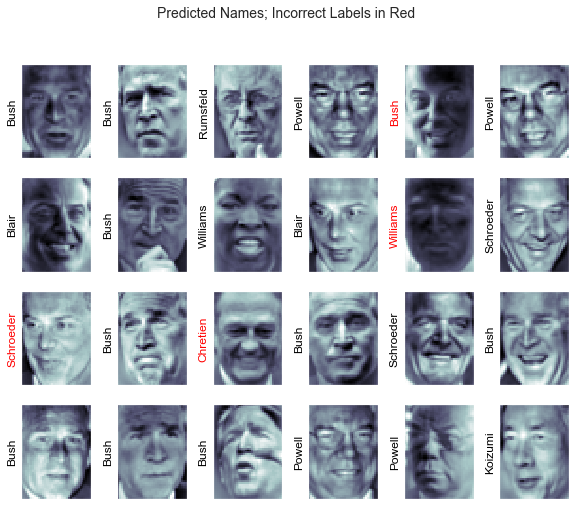

In [28]:
plot_predicted_names(y_pred)

## Dimensionality Reduction using PCA

Principal Component Analysis (PCA) is a machine learning algorithm that is widely used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data’s variation as possible.

Let us see this in easier terms.  
Suppose we have a problem for which we are collecting data. Our dataset results in several variables, many features, all of which affect the results in different aspects. We may choose to eliminate certain features, but that would mean losing information.  
A method for reducing the number of features (reducing data dimensionality) is to create new features by extracting the important information and dropping the least important ones. In this way, our information will not be lost and we will have reduced features, and there will be fewer chances of overfitting our model.

Check Matt Brems’s [article](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) for an in-depth comprehension of the algorithm.

9. We want to improve our score using PCA. 

Each image contains [50 x 37] = 1,850 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis to extract 150 fundamental components to feed into our support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline.

In [29]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)
svc_pca = SVC(kernel='rbf', class_weight='balanced')
model_pipeline = make_pipeline(pca, svc_pca)

10. We repeat a GridSarch with the new data 

In [30]:
param_grid_pca = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model_pipeline, param_grid_pca)

In [31]:
%time grid.fit(X_train, y_train)
#print(grid.best_params_)

CPU times: user 57.5 s, sys: 412 ms, total: 57.9 s
Wall time: 34 s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='randomized', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                         

11. We check the score 

In [32]:
print(grid.best_params_)
print(grid.score(X_test, y_test)*100)

{'svc__C': 1, 'svc__gamma': 0.005}
82.26495726495726


In [33]:
model2 = grid.best_estimator_
model2.score(X_test, y_test)*100

82.26495726495726

12. We create a ```y_pred``` which contains the predictions for the pipeline model

In [34]:
y_pred_pca = model2.predict(X_test)

13. We check the results in a confusion matrix

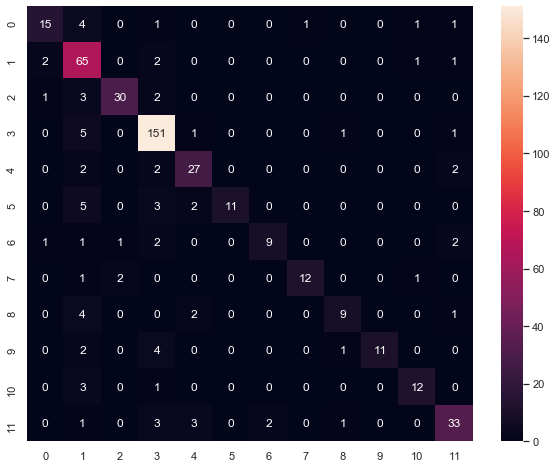

In [35]:
cm = confusion_matrix(y_test, y_pred_pca)
sns.heatmap(cm, annot = True, fmt = "d", xticklabels = True, yticklabels = True)

14. And plot the results as we did before.

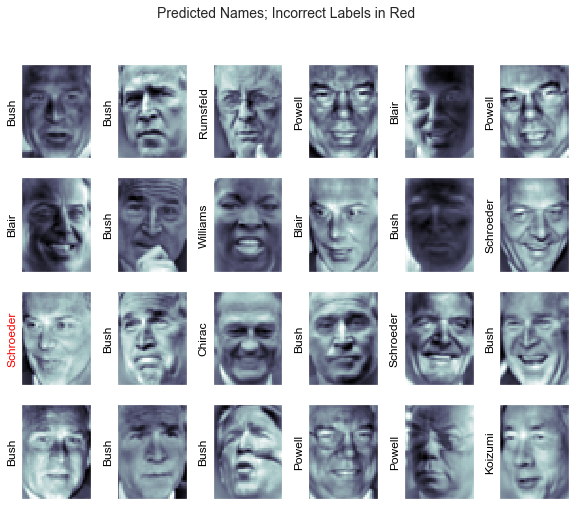

In [36]:
plot_predicted_names(y_pred_pca)